In [1]:
import pandas as pd
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.regularizers import l2
import os
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Defining the path for train and test images
data_dir = pathlib.Path("/kaggle/input/tomatoleaf/tomato")
train='/kaggle/input/tomatoleaf/tomato/train'
test='/kaggle/input/tomatoleaf/tomato/val'

In [3]:
# Here we have two class.
dataset_path_train = os.listdir(train)
print (dataset_path_train)
print("Types of classes labels found: ", len(dataset_path_train))

['Tomato___Late_blight', 'Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite']
Types of classes labels found:  10


In [4]:
# This Parameter we can use it in the network and model
batch_size = 32
img_height = 224
img_width = 224

In [5]:
# For train data set
train_ds = image_dataset_from_directory(train, 
                                        seed = 123, 
                                        image_size=(img_height, img_width), 
                                        validation_split=0.2, 
                                        subset='training')

Found 10000 files belonging to 10 classes.
Using 8000 files for training.


In [6]:
# here we can put the validate data
val_ds = image_dataset_from_directory(train, 
                                      seed = 123, 
                                      image_size=(img_height, img_width), 
                                      validation_split=0.2, 
                                      subset='validation')

Found 10000 files belonging to 10 classes.
Using 2000 files for validation.


In [7]:
# here we can put the test data
test_ds = image_dataset_from_directory(test, 
                                      seed = 123, 
                                      image_size=(img_height, img_width), 
                                      validation_split=None)

Found 1000 files belonging to 10 classes.


In [8]:
class_names = train_ds.class_names
print(len(class_names))
print(class_names)

10
['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [9]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 224, 224, 3)
(32,)


In [10]:
num_classes = 10

# Building model with data augmentation and drop out layers
# Model building - Data augmentation -> Rescaling -> Conv2D -> MaxPooling2D -> Conv2D -> MaxPooling2D -> Conv2D -> MaxPooling2D -> Dropout -> Dense -> Dense
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(16, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.15))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes))

In [11]:
# Compile the model 
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

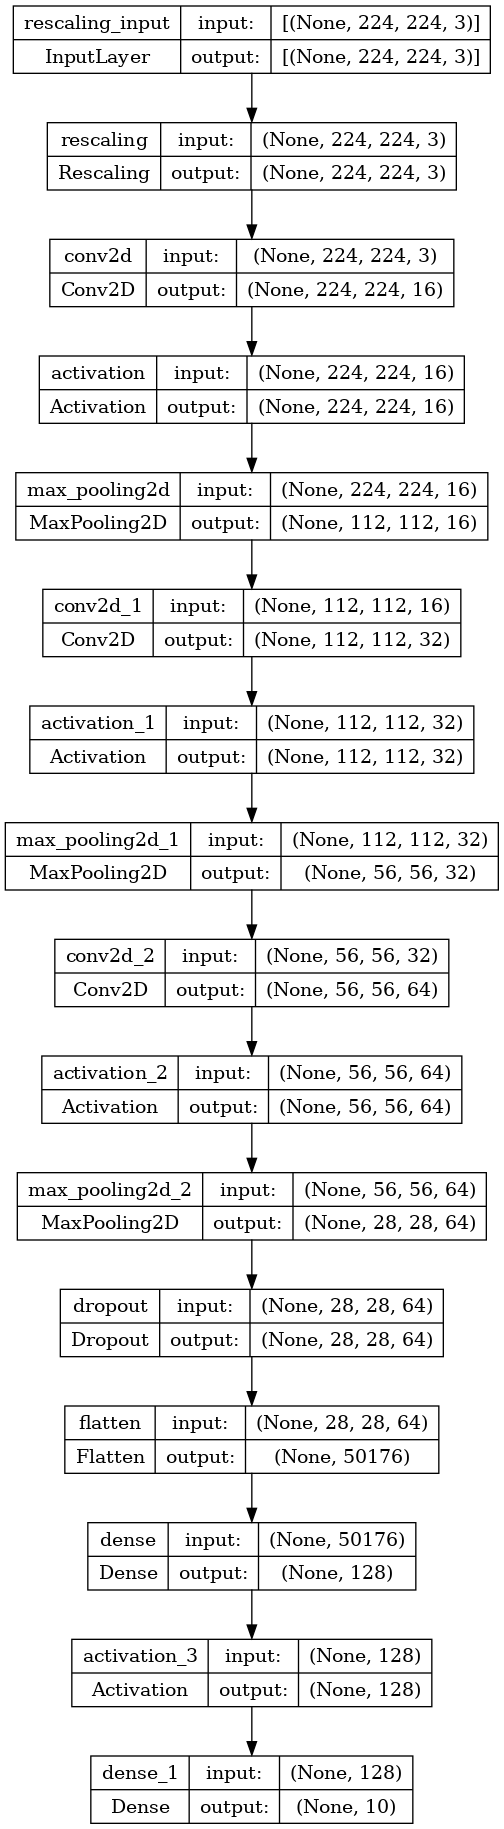

In [12]:
from tensorflow.keras.utils import to_categorical, plot_model
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

In [13]:
epochs = 30

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


2023-11-09 15:20:54.471096: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


250/250 [==============================] - 36s 93ms/step - loss: 1.2048 - accuracy: 0.5800 - val_loss: 0.7881 - val_accuracy: 0.7180
Epoch 2/30
250/250 [==============================] - 12s 48ms/step - loss: 0.4873 - accuracy: 0.8336 - val_loss: 0.4887 - val_accuracy: 0.8310
Epoch 3/30
250/250 [==============================] - 12s 48ms/step - loss: 0.3285 - accuracy: 0.8886 - val_loss: 0.3801 - val_accuracy: 0.8685
Epoch 4/30
250/250 [==============================] - 12s 48ms/step - loss: 0.2125 - accuracy: 0.9269 - val_loss: 0.4969 - val_accuracy: 0.8515
Epoch 5/30
250/250 [==============================] - 12s 48ms/step - loss: 0.1747 - accuracy: 0.9410 - val_loss: 0.3798 - val_accuracy: 0.8790
Epoch 6/30
250/250 [==============================] - 12s 48ms/step - loss: 0.1259 - accuracy: 0.9580 - val_loss: 0.5434 - val_accuracy: 0.8695
Epoch 7/30
250/250 [==============================] - 12s 47ms/step - loss: 0.0860 - accuracy: 0.9722 - val_loss: 0.5658 - val_accuracy: 0.8545
Epo

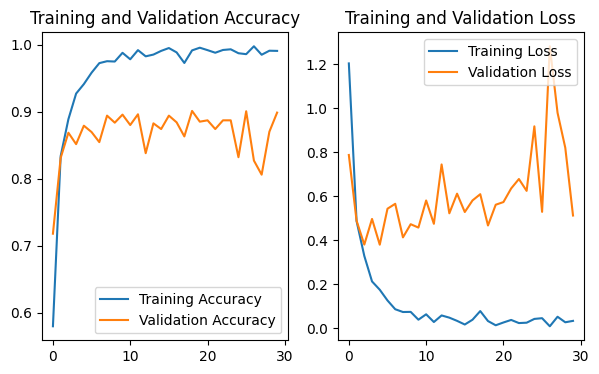

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(7, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
preformance = model.evaluate(test_ds)
preformance

32/32 [==============================] - 3s 60ms/step - loss: 0.9533 - accuracy: 0.8620


[0.9533364772796631, 0.8619999885559082]

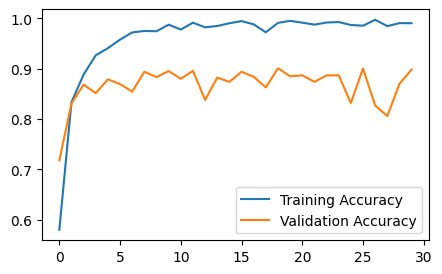

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
no_of_epochs = history.params['epochs']
len(history.history['accuracy']) == no_of_epochs
plt.figure(figsize=(5, 3))

plt.plot(range(no_of_epochs), acc, label='Training Accuracy')
plt.plot(range(no_of_epochs), val_acc, label='Validation Accuracy')

plt.legend()
plt.show()

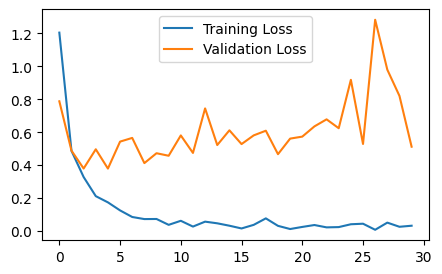

In [17]:
plt.figure(figsize=(5,3))

plt.plot(range(no_of_epochs), loss, label='Training Loss')
plt.plot(range(no_of_epochs), val_loss, label='Validation Loss')

plt.legend()
plt.show()

actual label: Tomato___Leaf_Mold
1/1 [==============================] - 0s 139ms/step
predicted label: Tomato___Leaf_Mold


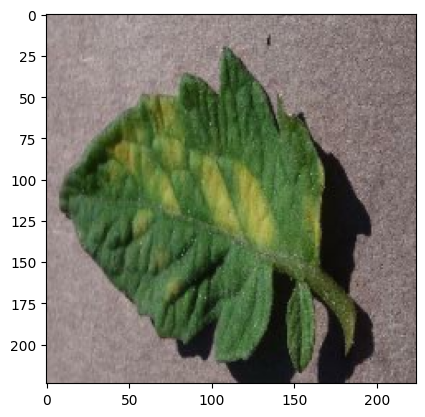

In [18]:
labels = train_ds.class_names
labels
for images_batch, labels_batch in test_ds.take(1):
    
    image = images_batch[0].numpy().astype('uint8')
    label = labels_batch[0].numpy()
    
    plt.imshow(image)
    print("actual label:", labels[label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:", labels[np.argmax(batch_prediction[0])])

In [19]:
from tensorflow import expand_dims, newaxis

def predict(model, img):
    
    img_array = img.numpy()
    img_array = expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = labels[np.argmax(predictions[0])]
    confidence = round( (np.max(predictions[0])), 2)
    
    return predicted_class, confidence

1/1 [==============================] - 0s 20ms/step


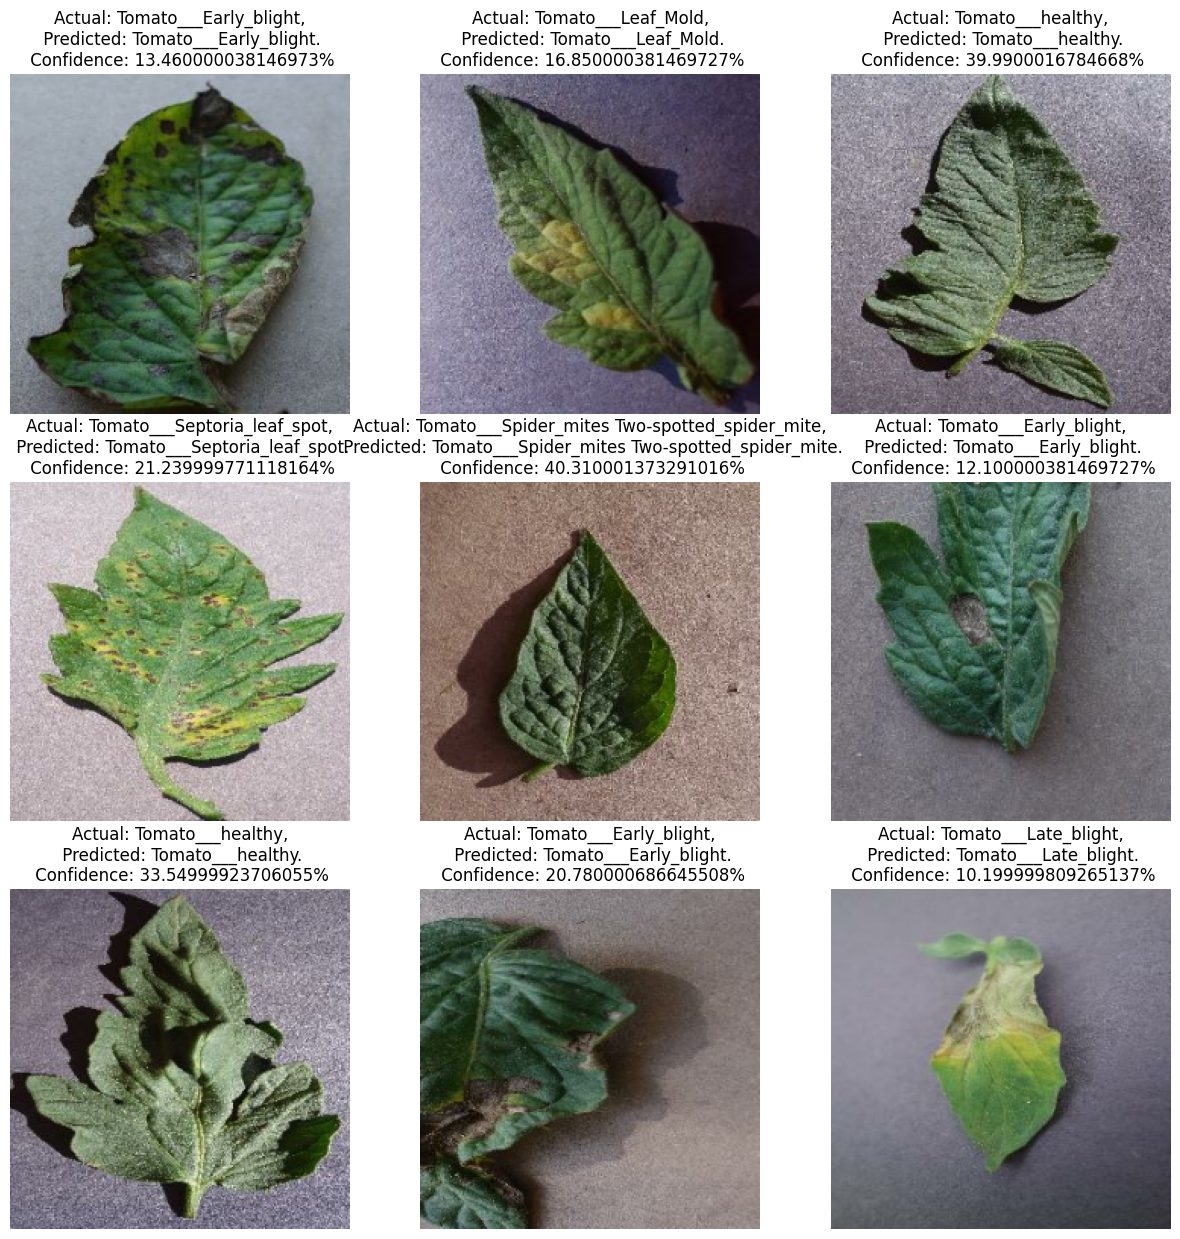

In [20]:
plt.figure(figsize=(15, 15))

for images, lbs in test_ds.take(1):
    for i in range(9):
        
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint32"))
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = labels[lbs[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")